# 비대칭 데이터 문제
- https://imbalanced-learn.org/stable/over_sampling.html
-https://datascienceschool.net/03%20machine%20learning/14.02%20%EB%B9%84%EB%8C%80%EC%B9%AD%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%AC%B8%EC%A0%9C.html

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import numpy as np
import pandas as pd

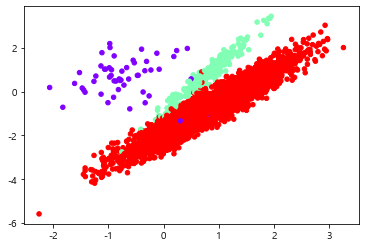

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, 
                           n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='rainbow')

## SMOTE
- 가우시안 나이브 등과 같은 알고리즘은 Class weight 파라미터가 없음

In [3]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print(f'normal data distribution: {Counter(y)}')
X_smote, y_smote = SMOTE().fit_resample(X,y)
print(f'SMOTE data distribution: {Counter(y_smote)}')

normal data distribution: Counter({2: 4674, 1: 262, 0: 64})
SMOTE data distribution: Counter({2: 4674, 1: 4674, 0: 4674})


## 원래 데이터로 예측

In [4]:
from sklearn import model_selection, metrics
from imblearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
clf = LinearSVC()
kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=11)

model_selection.cross_validate(clf, X, y, scoring='recall_macro', cv=kf)
print('\n')
model_selection.cross_val_score(clf, X, y, scoring='recall_macro', cv=kf)

{'fit_time': array([0.02593112, 0.0259316 , 0.01795197]),
 'score_time': array([0.00598359, 0.00099754, 0.00099707]),
 'test_score': array([0.69340238, 0.56378601, 0.59348149])}

array([0.69340238, 0.56378601, 0.59348149])

## Data over-under-combine

In [5]:
from imblearn.over_sampling import *
oversamplers = [RandomOverSampler(random_state=0), ADASYN(random_state=0),
                SMOTE(random_state=42)]
                
for sampler in oversamplers :
    imba_pipeline= make_pipeline(sampler, clf)
    model_selection.cross_val_score(imba_pipeline, X, y, scoring='recall_macro', cv=kf)
    print('\n')

array([0.8378122 , 0.82726718, 0.82383264])

array([0.53418115, 0.5825033 , 0.71177491])

array([0.84221685, 0.83272696, 0.82319038])

In [6]:
borderline_smote = [BorderlineSMOTE(random_state=13), SVMSMOTE(random_state=11)]
for sampler in borderline_smote :
    imba_pipeline= make_pipeline(sampler, clf)
    model_selection.cross_val_score(imba_pipeline, X, y, scoring='recall_macro', cv=kf)
    print('\n')

array([0.82447722, 0.86502517, 0.87378737])

array([0.8946434 , 0.91022688, 0.88909526])

In [7]:
from imblearn.under_sampling import *
undersamplers = [RandomUnderSampler(), TomekLinks(), OneSidedSelection()]
for sampler in undersamplers :
    imba_pipeline= make_pipeline(sampler, clf)
    model_selection.cross_val_score(imba_pipeline, X, y, scoring='recall_macro', cv=kf)
    print('\n')

array([0.84018235, 0.82590684, 0.82426081])

array([0.71716125, 0.57201646, 0.61246442])

array([0.75652295, 0.78432473, 0.64276745])

In [8]:
from imblearn.combine import *
combinesamplers = [SMOTEENN(random_state=0), SMOTETomek(random_state=4)]
for sampler in combinesamplers :
    imba_pipeline= make_pipeline(sampler, clf)
    model_selection.cross_val_score(imba_pipeline, X, y, scoring='recall_macro', cv=kf)
    print('\n')

array([0.86445475, 0.86012321, 0.83558527])

array([0.84414859, 0.83571076, 0.82468899])

# Ensemble of samplers
## Classifier including inner balancing samplers
https://imbalanced-learn.org/stable/ensemble.html
###  Bagging classifier

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier

bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0) 
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
rusboost = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R',
                              random_state=0)

for classifier in [bag, brf, rusboost] :
    classifier
    model_selection.cross_val_score(classifier, X, y, 
                                    #scoring='recall_macro', 
                                    cv=kf)
    print('\n')

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

array([0.98920216, 0.98980204, 0.98559424])

RUSBoostClassifier(n_estimators=200, random_state=0)

array([0.87822436, 0.80983803, 0.84393758])

# Imbalanced data
https://imbalanced-learn.org/stable/auto_examples/applications/plot_over_sampling_benchmark_lfw.html#sphx-glr-auto-examples-applications-plot-over-sampling-benchmark-lfw-py

In [23]:
import numpy as np
from sklearn.datasets import fetch_lfw_people

data = fetch_lfw_people()

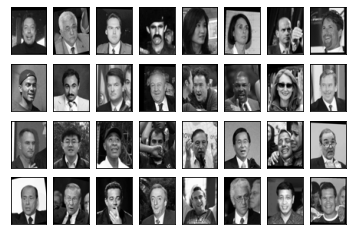

In [35]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(data.images[i], cmap='gray')

In [32]:
data.images[0].shape
62*47

(62, 47)

2914

In [26]:
george_bush_id = 1871  # Photos of George W. Bush
bill_clinton_id = 531  # Photos of Bill Clinton
classes = [george_bush_id, bill_clinton_id]
classes_name = np.array(["B. Clinton", "G.W. Bush"], dtype=object)

In [27]:
mask_photos = np.isin(data.target, classes)
X, y = data.data[mask_photos], data.target[mask_photos]
y = (y == george_bush_id).astype(np.int8)
y = classes_name[y]

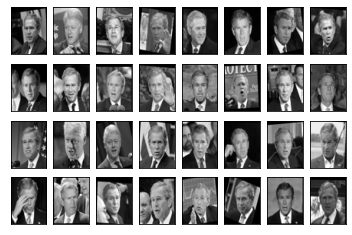

In [33]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i].reshape(62, 47), cmap='gray')

Text(0.5, 1.0, 'Class distribution')

The positive label considered as the minority class is B. Clinton


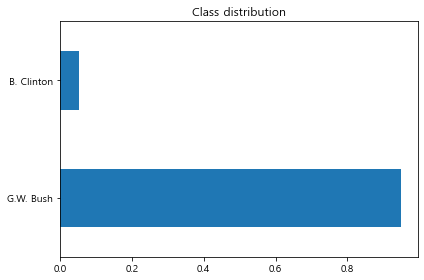

In [36]:
class_distribution = pd.Series(y).value_counts(normalize=True)
ax = class_distribution.plot.barh()
ax.set_title("Class distribution")
pos_label = class_distribution.idxmin()
plt.tight_layout()
print(f"The positive label considered as the minority class is {pos_label}")

In [37]:
from imblearn import FunctionSampler
from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)

pipeline = [
    make_pipeline(FunctionSampler(), classifier),
    make_pipeline(RandomOverSampler(random_state=42), classifier),
    make_pipeline(ADASYN(random_state=42), classifier),
    make_pipeline(SMOTE(random_state=42), classifier),
]

In [38]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=3)

In [39]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

disp = []
for model in pipeline:
    # compute the mean fpr/tpr to get the mean ROC curve
    mean_tpr, mean_fpr = 0.0, np.linspace(0, 1, 100)
    for train, test in cv.split(X, y):
        model.fit(X[train], y[train])
        y_proba = model.predict_proba(X[test])

        pos_label_idx = np.flatnonzero(model.classes_ == pos_label)[0]
        fpr, tpr, thresholds = roc_curve(
            y[test], y_proba[:, pos_label_idx], pos_label=pos_label
        )
        mean_tpr += np.interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0

    mean_tpr /= cv.get_n_splits(X, y)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    # Create a display that we will reuse to make the aggregated plots for
    # all methods
    disp.append(
        RocCurveDisplay(
            fpr=mean_fpr,
            tpr=mean_tpr,
            roc_auc=mean_auc,
            estimator_name=f"{model[0].__class__.__name__}",
        )
    )

Pipeline(steps=[('functionsampler', FunctionSampler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

Pipeline(steps=[('functionsampler', FunctionSampler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

Pipeline(steps=[('functionsampler', FunctionSampler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

Pipeline(steps=[('randomoversampler', RandomOverSampler(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

Pipeline(steps=[('randomoversampler', RandomOverSampler(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

Pipeline(steps=[('randomoversampler', RandomOverSampler(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

Pipeline(steps=[('adasyn', ADASYN(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

Pipeline(steps=[('adasyn', ADASYN(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

Pipeline(steps=[('adasyn', ADASYN(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

(-0.05, 1.05, -0.05, 1.05)

Text(0.5, 0.98, 'Comparison of over-sampling methods \nwith a 3NN classifier')

(0.0, 1.0)

(0.0, 1.0)

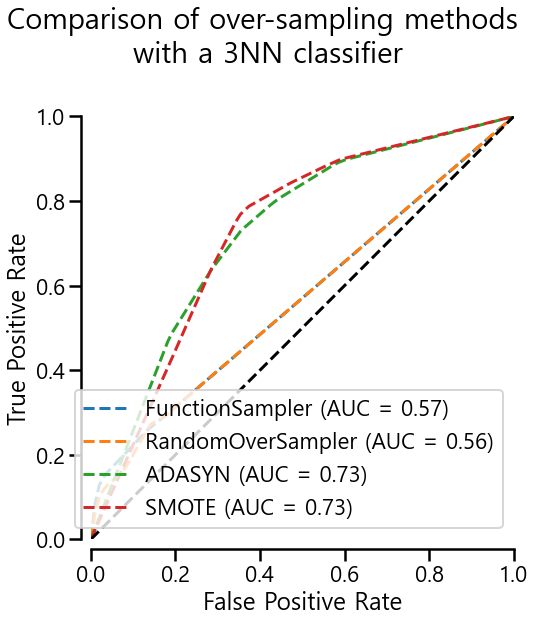

In [41]:
import seaborn as sns
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(9, 9))
for d in disp:
    d.plot(ax=ax, linestyle="--")
ax.plot([0, 1], [0, 1], linestyle="--", color="k")
ax.axis("square")
fig.suptitle("Comparison of over-sampling methods \nwith a 3NN classifier")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
sns.despine(offset=10, ax=ax)
plt.tight_layout()
plt.show()

# Feature Engineering with Image Data

https://towardsdatascience.com/feature-engineering-with-image-data-14fe4fcd4353

## Feature engineering with image data
- An important difference is how the approaches are treated in production. 
- Your model will not make predictions on augmented images. Yet, with feature engineering, your model will need to make predictions on the same features it was trained on. 
- This means you must be able to do the feature engineering in production.

# End